In [16]:
 #Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot  as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
# Load the dataset
df = pd.read_csv('House Price India.csv')


In [3]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


1. Multiple regression analysis

In [6]:
# Define the independent and dependent variables
X = df[['number of bathrooms', 'number of bedrooms','living area','lot area' ,'Postal Code']]
Y = df['Price']

# Add a constant to the independent variables to include the intercept term in the regression
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     3258.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:26:12   Log-Likelihood:            -2.0262e+05
No. Observations:               14620   AIC:                         4.052e+05
Df Residuals:                   14614   BIC:                         4.053e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.282e+08   1

2. Factor analysis

In [18]:

# Separate the features (independent variables) from the target variable (dependent variable)
X = df.drop('Price', axis=1)
y = df['Price']

# Create a factor analysis object with 3 components
fa = FactorAnalysis(n_components=3)

# Fit the factor analysis object to the data
X_fa = fa.fit_transform(X)

# Print the factor loadings for each feature
print(fa.components_)

# Print the variance explained by each component
#print(fa.explained_variance_)


[[-6.28489813e+02  2.89920492e-01  3.24297481e-02  6.26537596e-02
   1.63319667e+02  3.79112499e+04 -2.34111212e-03  2.32319886e-03
   6.03458327e-02 -5.65260286e-03  1.31104634e-01  1.54493175e+02
   8.82649206e+00  1.55128641e+00  2.86148804e+00  1.35251169e+00
  -1.26119209e-02  3.16790497e-02  1.05037599e+02  1.87703848e+04
  -1.07119234e-02  2.52791786e-02]
 [ 1.53058706e+02  3.05908358e-01 -6.10846209e-03 -2.22073694e-02
  -7.16921543e+01  7.32433389e+02  5.45082407e-03 -1.61665384e-03
  -1.71985541e-02 -1.32393030e-03 -6.15765425e-02 -7.35622787e+01
   1.87012449e+00 -1.48756066e+00 -5.50164477e-01 -7.26957887e-01
   5.06709771e-03 -1.96798743e-02 -7.94453733e+01 -1.80739353e+04
   1.83486745e-02  2.14170325e-01]
 [-4.22695213e+03 -1.95761301e+00  5.15558639e-01  6.05231468e-01
   8.60509642e+02 -1.33255451e-04  2.57428522e-01  8.39536216e-03
   1.98891970e-01 -8.25533159e-02  9.71462018e-01  7.38169400e+02
   1.22340242e+02  1.19169447e+01  1.74363365e+01 -2.70136058e+00
   1.3

3.Cluster Analysis

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-0.11451073 -0.58583966 -0.71100614 -0.38478765]
 [-0.10301004  0.83304727  1.02081367  0.52117774]
 [ 6.18598467  0.33451609  0.18074154  0.81785013]]


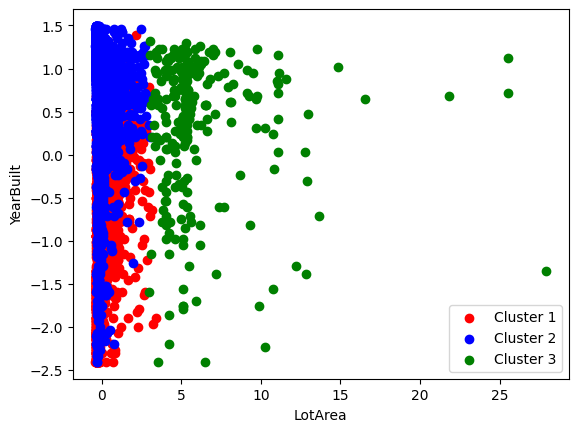

In [17]:

# Select the features for clustering
X = df[['lot area', 'Built Year', 'number of floors', 'living area']]

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

# Print the cluster centers
print(kmeans.cluster_centers_)

# Visualize the clusters
labels = kmeans.labels_
fig, ax = plt.subplots()
ax.scatter(X_std[labels==0, 0], X_std[labels==0, 1], c='red', label='Cluster 1')
ax.scatter(X_std[labels==1, 0], X_std[labels==1, 1], c='blue', label='Cluster 2')
ax.scatter(X_std[labels==2, 0], X_std[labels==2, 1], c='green', label='Cluster 3')
ax.set_xlabel('LotArea')
ax.set_ylabel('YearBuilt')
ax.legend()
plt.show()
